In [45]:
from dimarray import read_nc, get_datadir, DimArray, Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
plt.style.use("seaborn-white")

Cargo mapas de color

In [46]:
################ Map ################

# V map
V=3
levels = np.concatenate([[0,2,5,10,20,50,100,200,500,1000,2000]])
colors =['#ffffff','#d9c8e0','#bcb3d4','#9087ba','#61409b','#00b1ff','#ffef37','#e0d018','#ffa200','#ff0000']
cmap, norm = mcolors.from_levels_and_colors(levels, colors)
cmap.set_over(plt.cm.jet(240))
cmap_v, norm_v = mcolors.from_levels_and_colors(levels, colors)
cmap_v.set_over(plt.cm.jet(240))

# velocity anomalies
levels_av = np.concatenate([[-375,-175,-75,-37.5,-17.5,-5,\
                            5,17.5,37.5,75,175,375]])
colors_av = plt.cm.seismic(np.linspace(0.15,0.85,levels_av.size-1,endpoint=True))
cmap_av, norm_av = mcolors.from_levels_and_colors(levels_av, colors_av)
cmap_av.set_under(plt.cm.seismic(0))
cmap_av.set_over(plt.cm.seismic(255))

# surface
N = 14
lim_min = 0.1
lim_max = 3500
colors_s = plt.cm.gist_gray(np.linspace(0.5,0.9,N,endpoint=True))
levels_s = np.concatenate([np.linspace(lim_min,lim_max,N+1)])
cmap_s, norm_s = mcolors.from_levels_and_colors(levels_s, colors_s)
cmap_s.set_over(plt.cm.gist_gray(250))

# shelf
SH = 5
sh_min = 0.01
sh_max = 500
colors_sh = plt.cm.autumn(np.linspace(0.95,0.15,SH,endpoint=True))
levels_sh = np.concatenate([np.linspace(sh_min,sh_max,SH+1)])
cmap_sh, norm_sh = mcolors.from_levels_and_colors(levels_sh, colors_sh)
cmap_sh.set_over(plt.cm.autumn(20))

"""
# H anomalies
AH = 9
min_AH = -1350
max_AH = 1350
colors_ah = plt.cm.RdBu(np.linspace(0.2,0.8,AH,endpoint=True))
levels_ah = np.concatenate([np.linspace(min_AH,max_AH,AH+1)])
cmap_ah, norm_ah = mcolors.from_levels_and_colors(levels_ah, colors_ah)
cmap_ah.set_over(plt.cm.RdBu(250))
cmap_ah.set_under(plt.cm.RdBu(0))
"""

# H anomalies
AH = 4
min_AH = -850
max_AH = 125
colors_ah = plt.cm.RdBu(np.linspace(0.2,0.5,AH,endpoint=True))
levels_ah = np.concatenate([np.linspace(min_AH,max_AH,AH+1)])
cmap_ah, norm_ah = mcolors.from_levels_and_colors(levels_ah, colors_ah)
cmap_ah.set_over(plt.cm.RdBu(250))
cmap_ah.set_under(plt.cm.RdBu(0))

# Bedrock
levels_b = np.concatenate([[-2000,-1500,-1000,-500,0,250,500,750,1000]])
colors_b_1 = plt.cm.Blues(np.linspace(0.95, 0.5, 4,endpoint=True))
colors_b_2 = plt.cm.BrBG(np.linspace(0.4,0.1,4,endpoint=True))
colors_b = np.vstack((colors_b_1, colors_b_2))
cmap_b, norm_b = mcolors.from_levels_and_colors(levels_b, colors_b)
cmap_b.set_under(plt.cm.Blues(255))
cmap_b.set_over(plt.cm.BrBG(10))

# Surface temp.
T = 5
min_t = 0.0
max_t = 25.0
colors_t = plt.cm.coolwarm(np.linspace(0.6,0.95,T,endpoint=True))
levels_t = np.concatenate([np.linspace(min_t,max_t,T+1)])
cmap_t, norm_t = mcolors.from_levels_and_colors(levels_t, colors_t)
cmap_t.set_under(plt.cm.coolwarm(60))
cmap_t.set_over(plt.cm.jet(260))

# Ocean tf.
TF = 10
min_tf = -2.0
max_tf = 3.0
levels_tf = np.concatenate([np.linspace(min_tf,max_tf,TF+1)])
colors_tf_1 = plt.cm.coolwarm(np.linspace(0.1,0.45,4,endpoint=True))
colors_tf_2 = plt.cm.coolwarm(np.linspace(0.65,0.9,6,endpoint=True))
colors_tf = np.vstack((colors_tf_1, colors_tf_2))
cmap_tf, norm_tf = mcolors.from_levels_and_colors(levels_tf, colors_tf)
cmap_tf.set_under(plt.cm.coolwarm(0))
cmap_tf.set_over(plt.cm.coolwarm(260))

# Precip. fraction
P=10
levels_p = np.concatenate([[50,60,70,80,90,100,120,140,160,180,200]])
colors_p = plt.cm.PRGn(np.linspace(0.75,0.25,P,endpoint=True))
cmap_p, norm_p = mcolors.from_levels_and_colors(levels_p, colors_p)
cmap_p.set_under(plt.cm.PRGn(240))
cmap_p.set_over(plt.cm.PRGn(20))


Primero dibujare las curvas de forzamiento

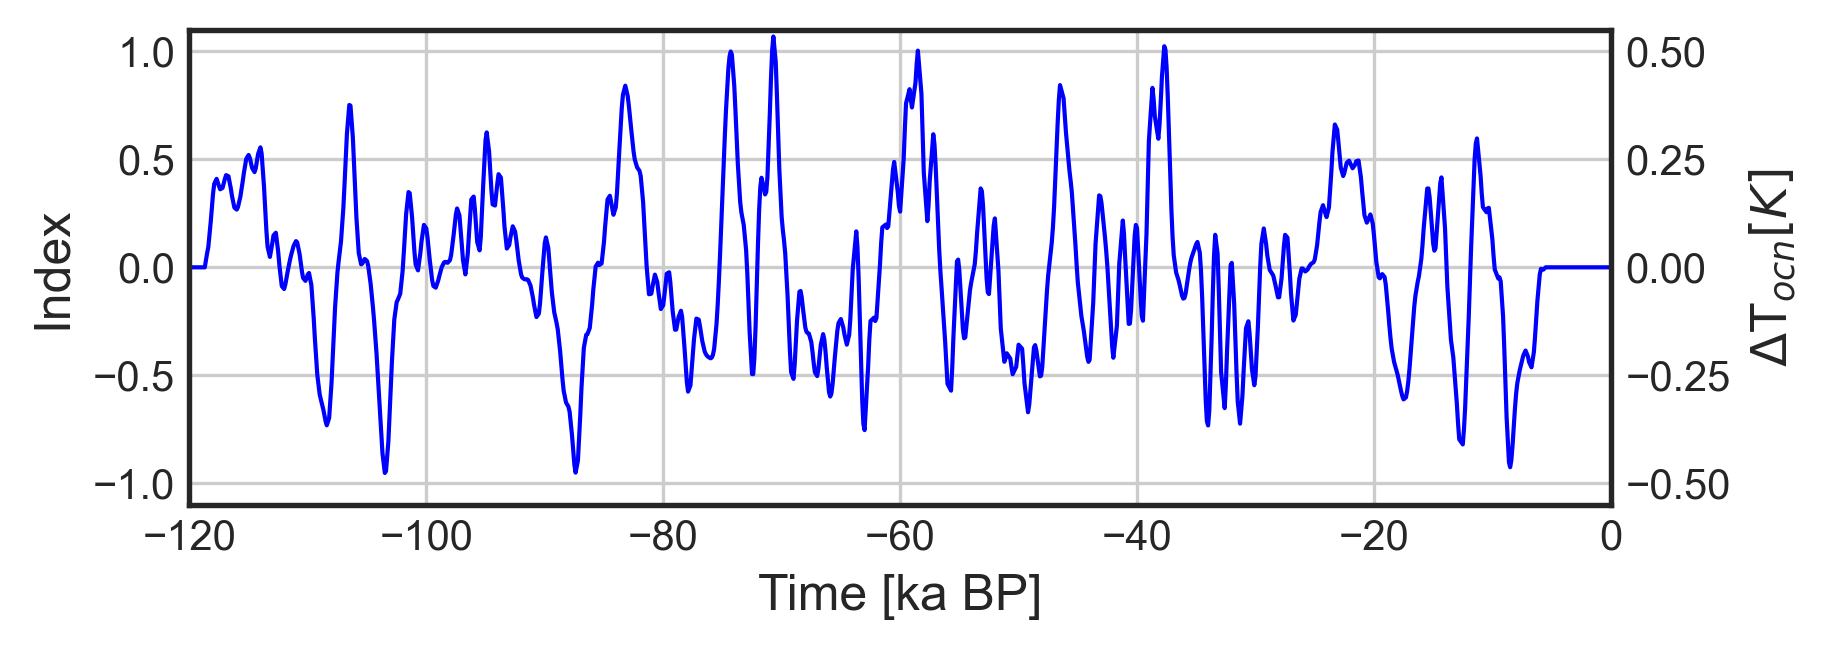

In [47]:
# load EPICA millennail
f       = open("/home/javier/Documentos/TFG_MariaLG//epica_millennial.dat")   # EPICA Dome C
epica   = np.loadtxt(f)
time    = epica[:,0] * 10**-3
index_b = epica[:,1]

# draw both signals
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(211)

ax1.plot(time,index_b,'b',lw=1,label='Original')
ax1.set_xlabel(r'Time [ka BP]',fontsize=12)
ax1.set_ylabel(r'Index',fontsize=12)
ax1.set_xlim(-120,0)
ax1.set_ylim(-1.1,1.1)

# twin x
ax2 = ax1.twinx()
ax2.set_ylim(-0.5*1.1,0.5*1.1)
ax2.set_ylabel(r'$\Delta$T$_{ocn} [K]$',fontsize=12)

plt.tick_params(axis='both', labelsize=10)
ax1.grid()
plt.tight_layout()
plt.show()

Ahora dibujare las contribuciones al nivel del mar y extension de la Antártida para cada sensibilidad oceánica

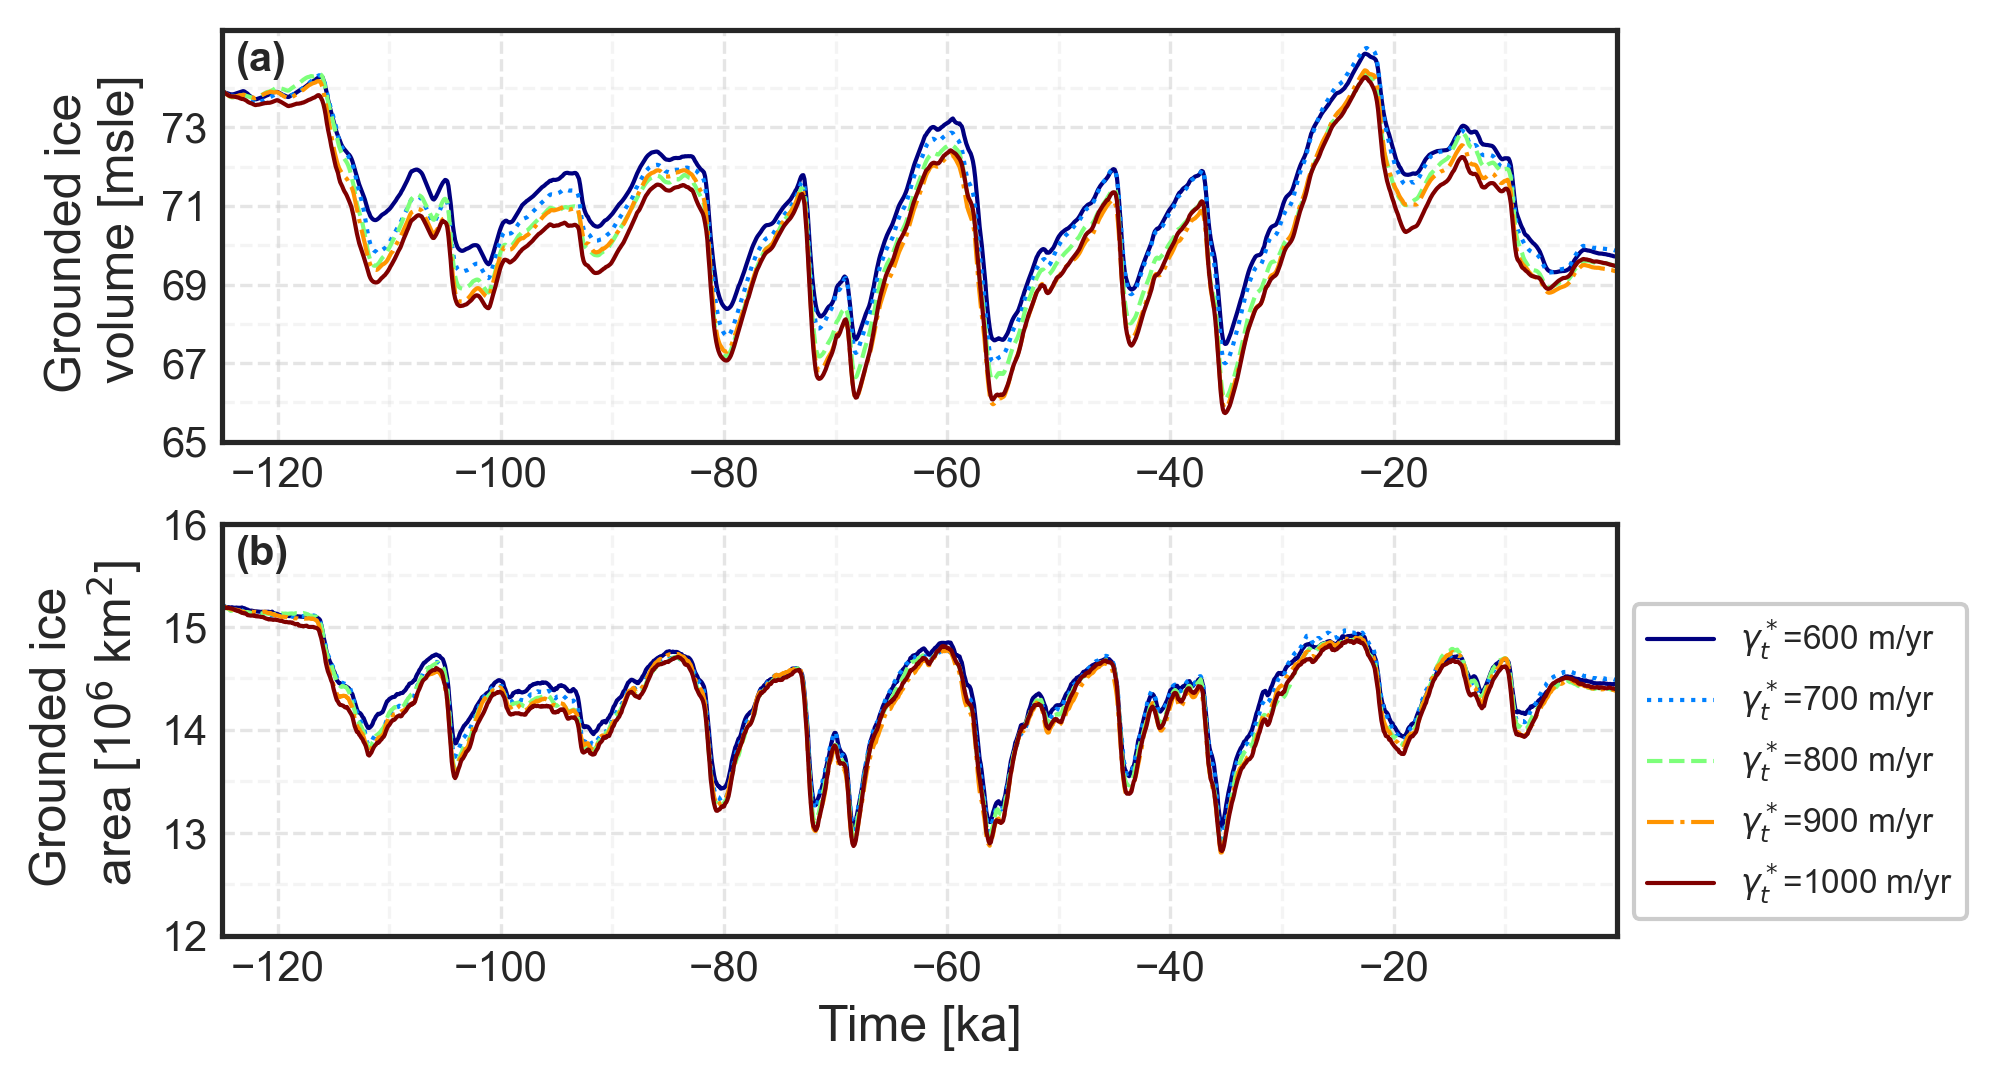

In [48]:
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

path = '/home/javier/Documentos/TFG_MariaLG/pico_millennial/gmmtstr.'

# These are the name of the folders for loading the data
gamma_tstar = [600,700,800,900,1000]

# linestyle
ls = ['-',':','--','-.','-']
# colors for plotting. I add as many colors as models.
colors = plt.cm.jet(np.linspace(0.0,1.0,len(gamma_tstar),endpoint=True))

c=0
for i in range(len(gamma_tstar)):
    data = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo1D.nc')
    sim = read_nc(data)        
    size = sim.time.size
    isvol = sim['V_sle'] # ice sheet volume above flotation
    area = sim['A_ice_g'] # ice sheet grounded area
    time = sim['time']*10**-3
    ax1.plot(time,isvol,lw=1,color=colors[c],linestyle=ls[i],alpha=1.0)
    ax2.plot(time,area,lw=1,color=colors[c],linestyle=ls[i],alpha=1.0,label=r'$\gamma_t^*$='+str(gamma_tstar[i])+' m/yr')
    c=c+1


ax1.set_xlim(-125,0)
ax1.set_xlabel('',fontsize=12)
ax1.set_ylabel('Grounded ice \n volume [msle]',fontsize=12)
ax2.set_xlim(-125,0)
ax2.set_ylabel('Grounded ice \n area [10$^6$ km$^2$]',fontsize=12)
ax2.set_xlabel('Time [ka]',fontsize=12)


ax1.annotate('(a)', xy=(0.01, 0.9), xycoords='axes fraction',fontsize=10,fontweight='bold')
ax2.annotate('(b)', xy=(0.01, 0.9), xycoords='axes fraction',fontsize=10,fontweight='bold')


############### X-ticks ##########################

majorx_ticks = np.arange(-120, 0, 20)
minorx_ticks = np.arange(-120, 0, 10)
ax1.set_xticks(majorx_ticks)
ax1.set_xticks(minorx_ticks, minor=True)
ax2.set_xticks(majorx_ticks)
ax2.set_xticks(minorx_ticks, minor=True)

############### Y-ticks ##########################

majory_ticks = np.arange(65, 75, 2)
minory_ticks = np.arange(65, 75, 1)
ax1.set_yticks(majory_ticks)
ax1.set_yticks(minory_ticks, minor=True)

majory_ticks = np.arange(12, 16.1, 1)
minory_ticks = np.arange(12, 16.1, 0.5)
ax2.set_yticks(majory_ticks)
ax2.set_yticks(minory_ticks, minor=True)

############## Grid ##############################

ax1.grid(which='minor', alpha=0.2,linestyle='--')
ax1.grid(which='major', alpha=0.5,linestyle='--')
ax2.grid(which='minor', alpha=0.2,linestyle='--')
ax2.grid(which='major', alpha=0.5,linestyle='--')

############## Legend ############################
ax2.legend(loc=3,prop={'size': 8},bbox_to_anchor=[1.0,0],ncol=1,frameon=True,framealpha=True)

plt.show()


Ahora dibujare la extensión antártica durante el máximo glacial

/tmp/ipykernel_63138/2681357958.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


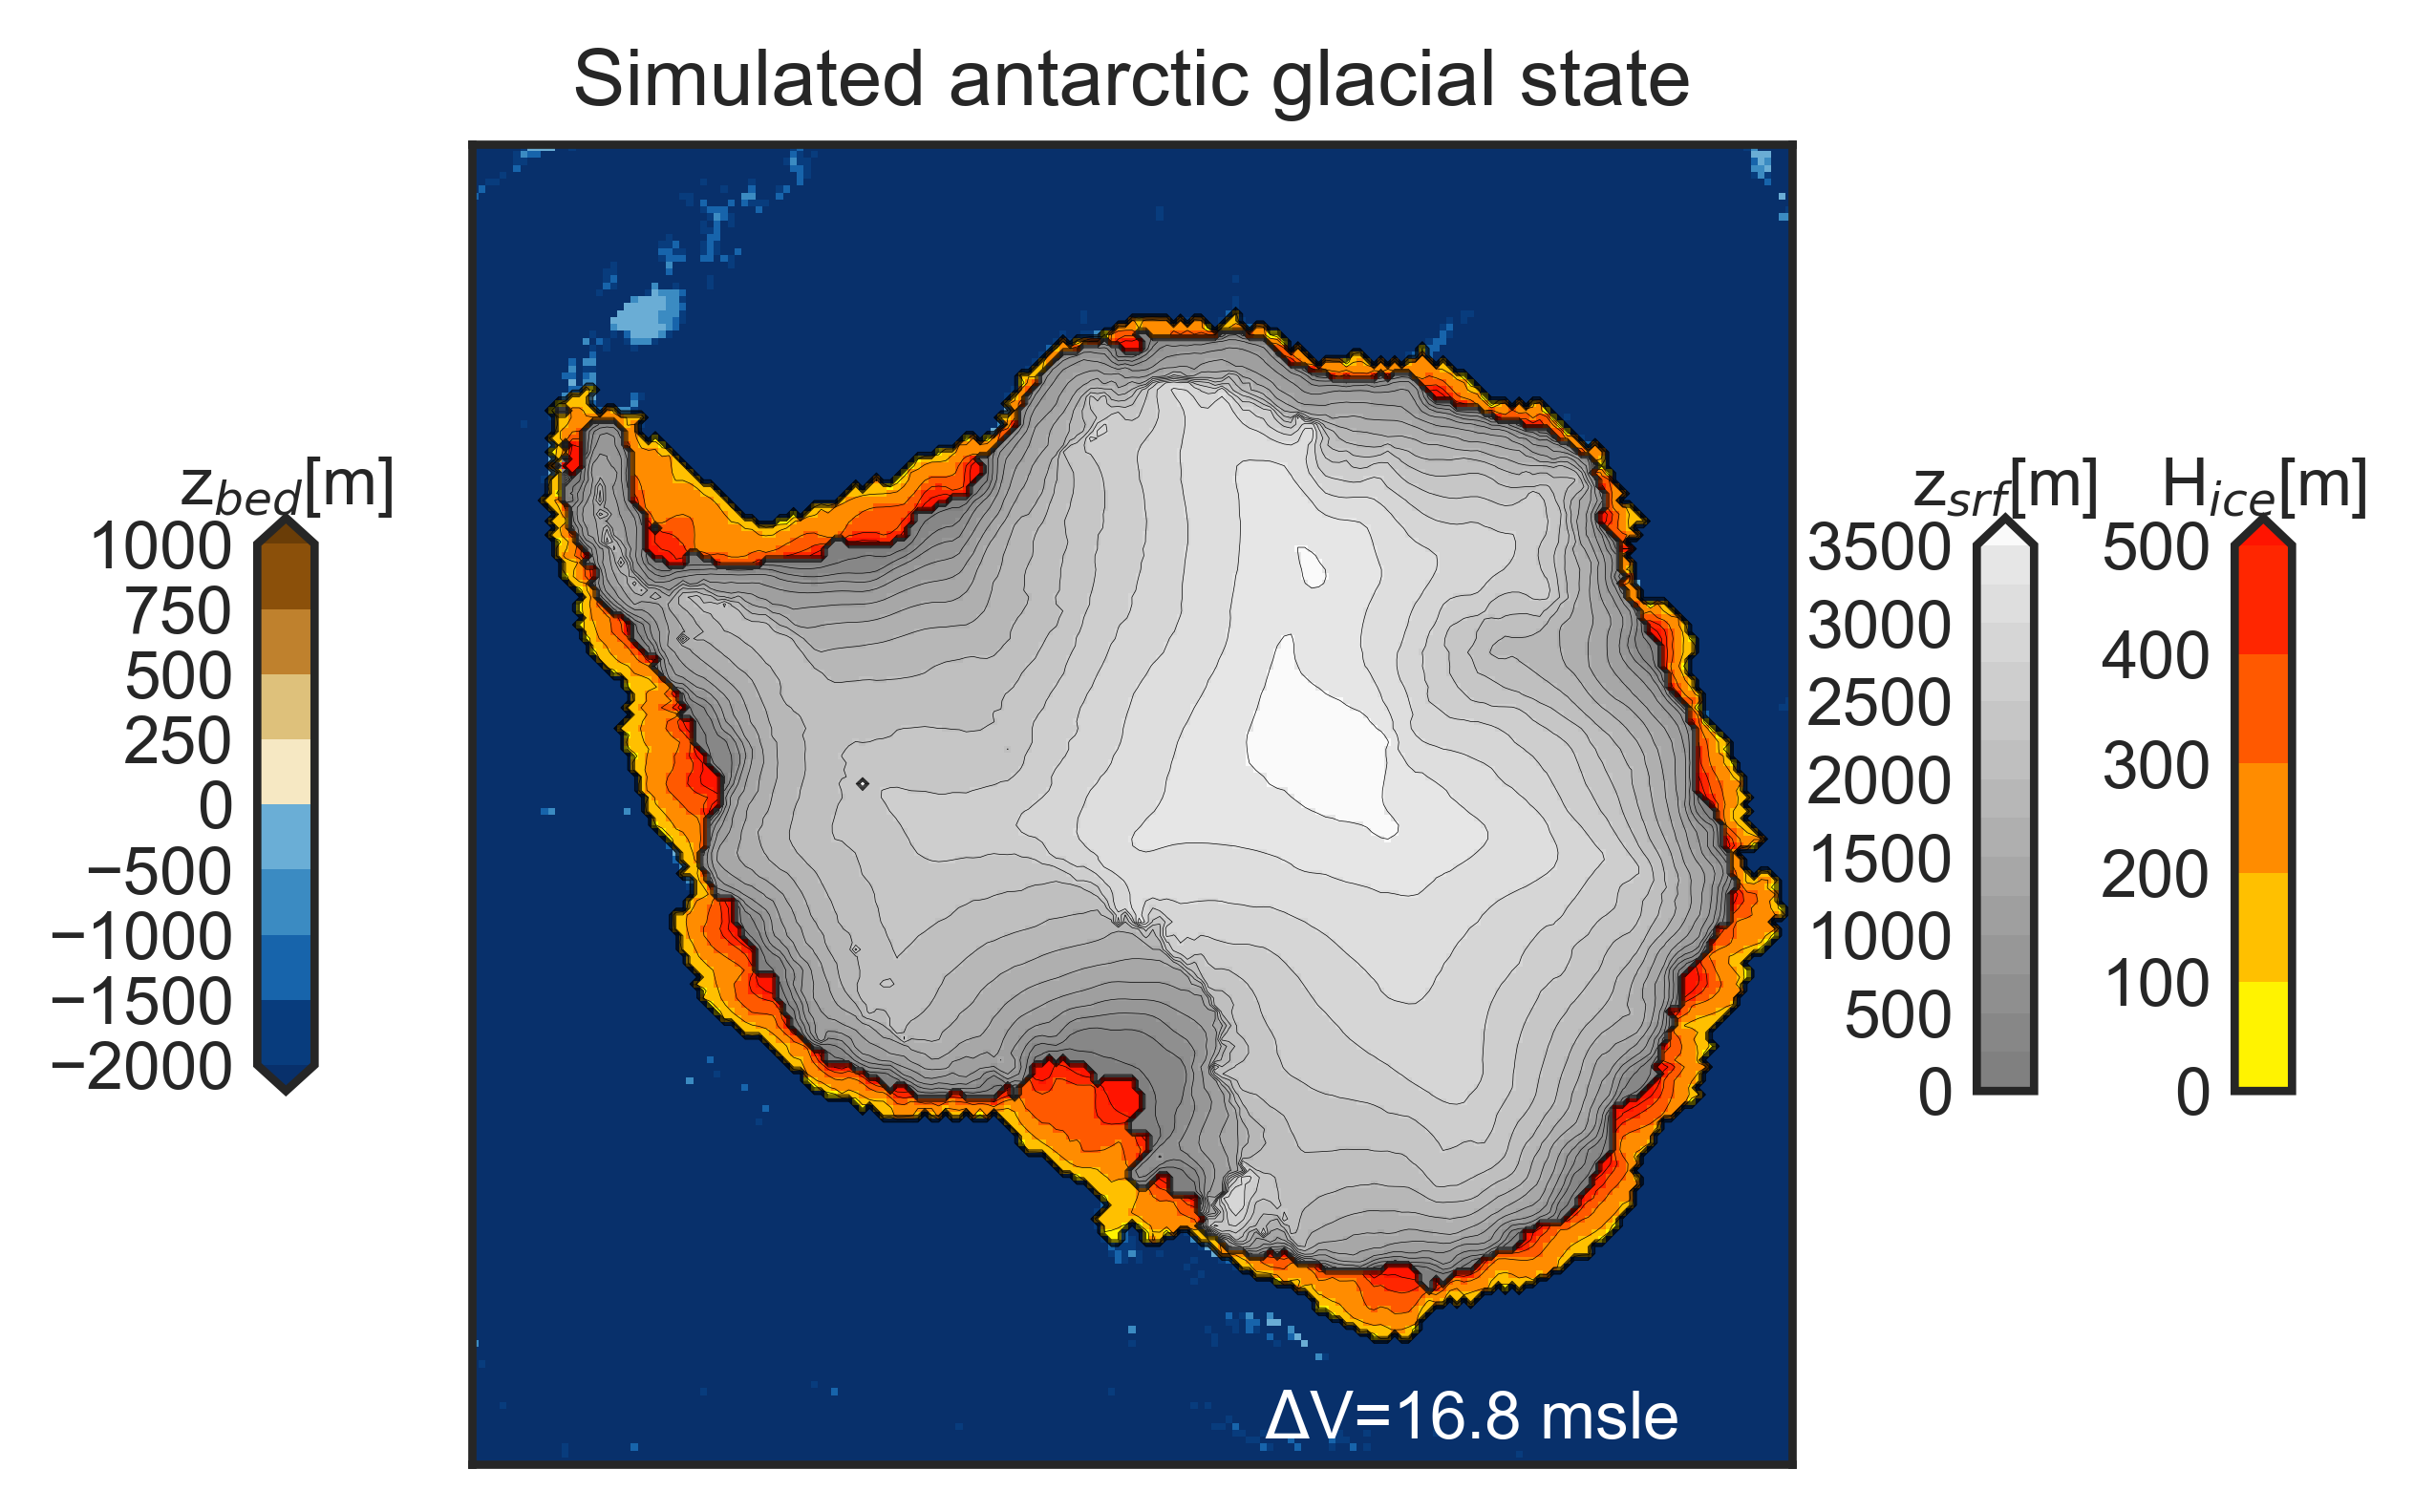

In [49]:
fig = plt.figure(dpi=500)
ax1 = fig.add_subplot(121)

ncfile = os.path.join(get_datadir(), str(path)+'lgm/yelmo1D.nc')
data = read_nc(ncfile)
size = data.time.size
vol_lgm = data['V_sle'].ix[size-1]
vsle = vol_lgm - data['V_sle'].ix[0]
ncfile = os.path.join(get_datadir(), str(path)+'lgm/yelmo2D_lgm.nc')
data = read_nc(ncfile)
z_bed = data['z_bed'].ix[0]
z_srf = data['z_srf'].ix[0]
mask = data['mask_bed'].ix[0]
H_ice = data['H_ice'].ix[0]
H_ice[H_ice<10.0] = 0.0
mask[mask>4]=0
mask[mask>0]=1
z_srf[mask==0]=np.nan
z_srf[H_ice==0]=np.nan
ncfile_shlf = os.path.join(get_datadir(), str(path)+'lgm/yelmo2D_lgm.nc')
data_shlf = read_nc(ncfile_shlf)
H_shlf = data_shlf['H_ice'].ix[0]
H_shlf[H_shlf<10.0] = 0.0
H_shlf[mask==1]=np.nan
mask_shlf = data_shlf['mask_bed'].ix[0]
mask_shlf[mask_shlf<5]=0
mask_shlf[mask_shlf>4]=1
        
im_b = ax1.imshow(z_bed,norm=norm_b,cmap=cmap_b)
im_s = ax1.imshow(z_srf,norm=norm_s,cmap=cmap_s)
im_sh = ax1.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
ax1.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
ax1.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
ax1.contour(mask==1,linewidths=0.1,colors='k')
ax1.contour(H_ice==0,linewidths=0.1,colors='k')

cax_s = fig.add_axes([0.55, 0.35, 0.02, 0.3])
cb_s = fig.colorbar(im_s, cax=cax_s,extend='max',orientation='vertical')
cb_s.ax.tick_params(labelsize=10,rotation=0)
cax_s.yaxis.set_ticks_position('left')
cb_s.ax.set_title(r'z$_{srf}$[m]',fontsize=10)

cax_sh = fig.add_axes([0.64, 0.35, 0.02, 0.3])
cb_sh = fig.colorbar(im_sh, cax=cax_sh,extend='max',orientation='vertical')
cb_sh.ax.tick_params(labelsize=10,rotation=0)
cax_sh.yaxis.set_ticks_position('left')
cb_sh.ax.set_title(r'H$_{ice}$[m]',fontsize=10)

cax_b = fig.add_axes([-0.05, 0.35, 0.02, 0.3])
cb_b = fig.colorbar(im_b, cax=cax_b,extend='both',orientation='vertical')
cb_b.ax.tick_params(labelsize=10,rotation=0)
cax_b.yaxis.set_ticks_position('left')
cb_b.ax.set_title(r'z$_{bed}$[m]',fontsize=10)

ax1.set_title('Simulated antarctic glacial state',fontsize=12)
ax1.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle))+' msle', xy=(0.6, 0.02), xycoords='axes fraction',fontsize=10,color='w')

ax1.invert_yaxis()
ax1.set_yticklabels([])
ax1.set_xticklabels([])
plt.tight_layout()
plt.show()

Ahora dibujare la extensión antártica en el periodo 36kyr (mínimo). Indice = 45

/tmp/ipykernel_63138/2186205415.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


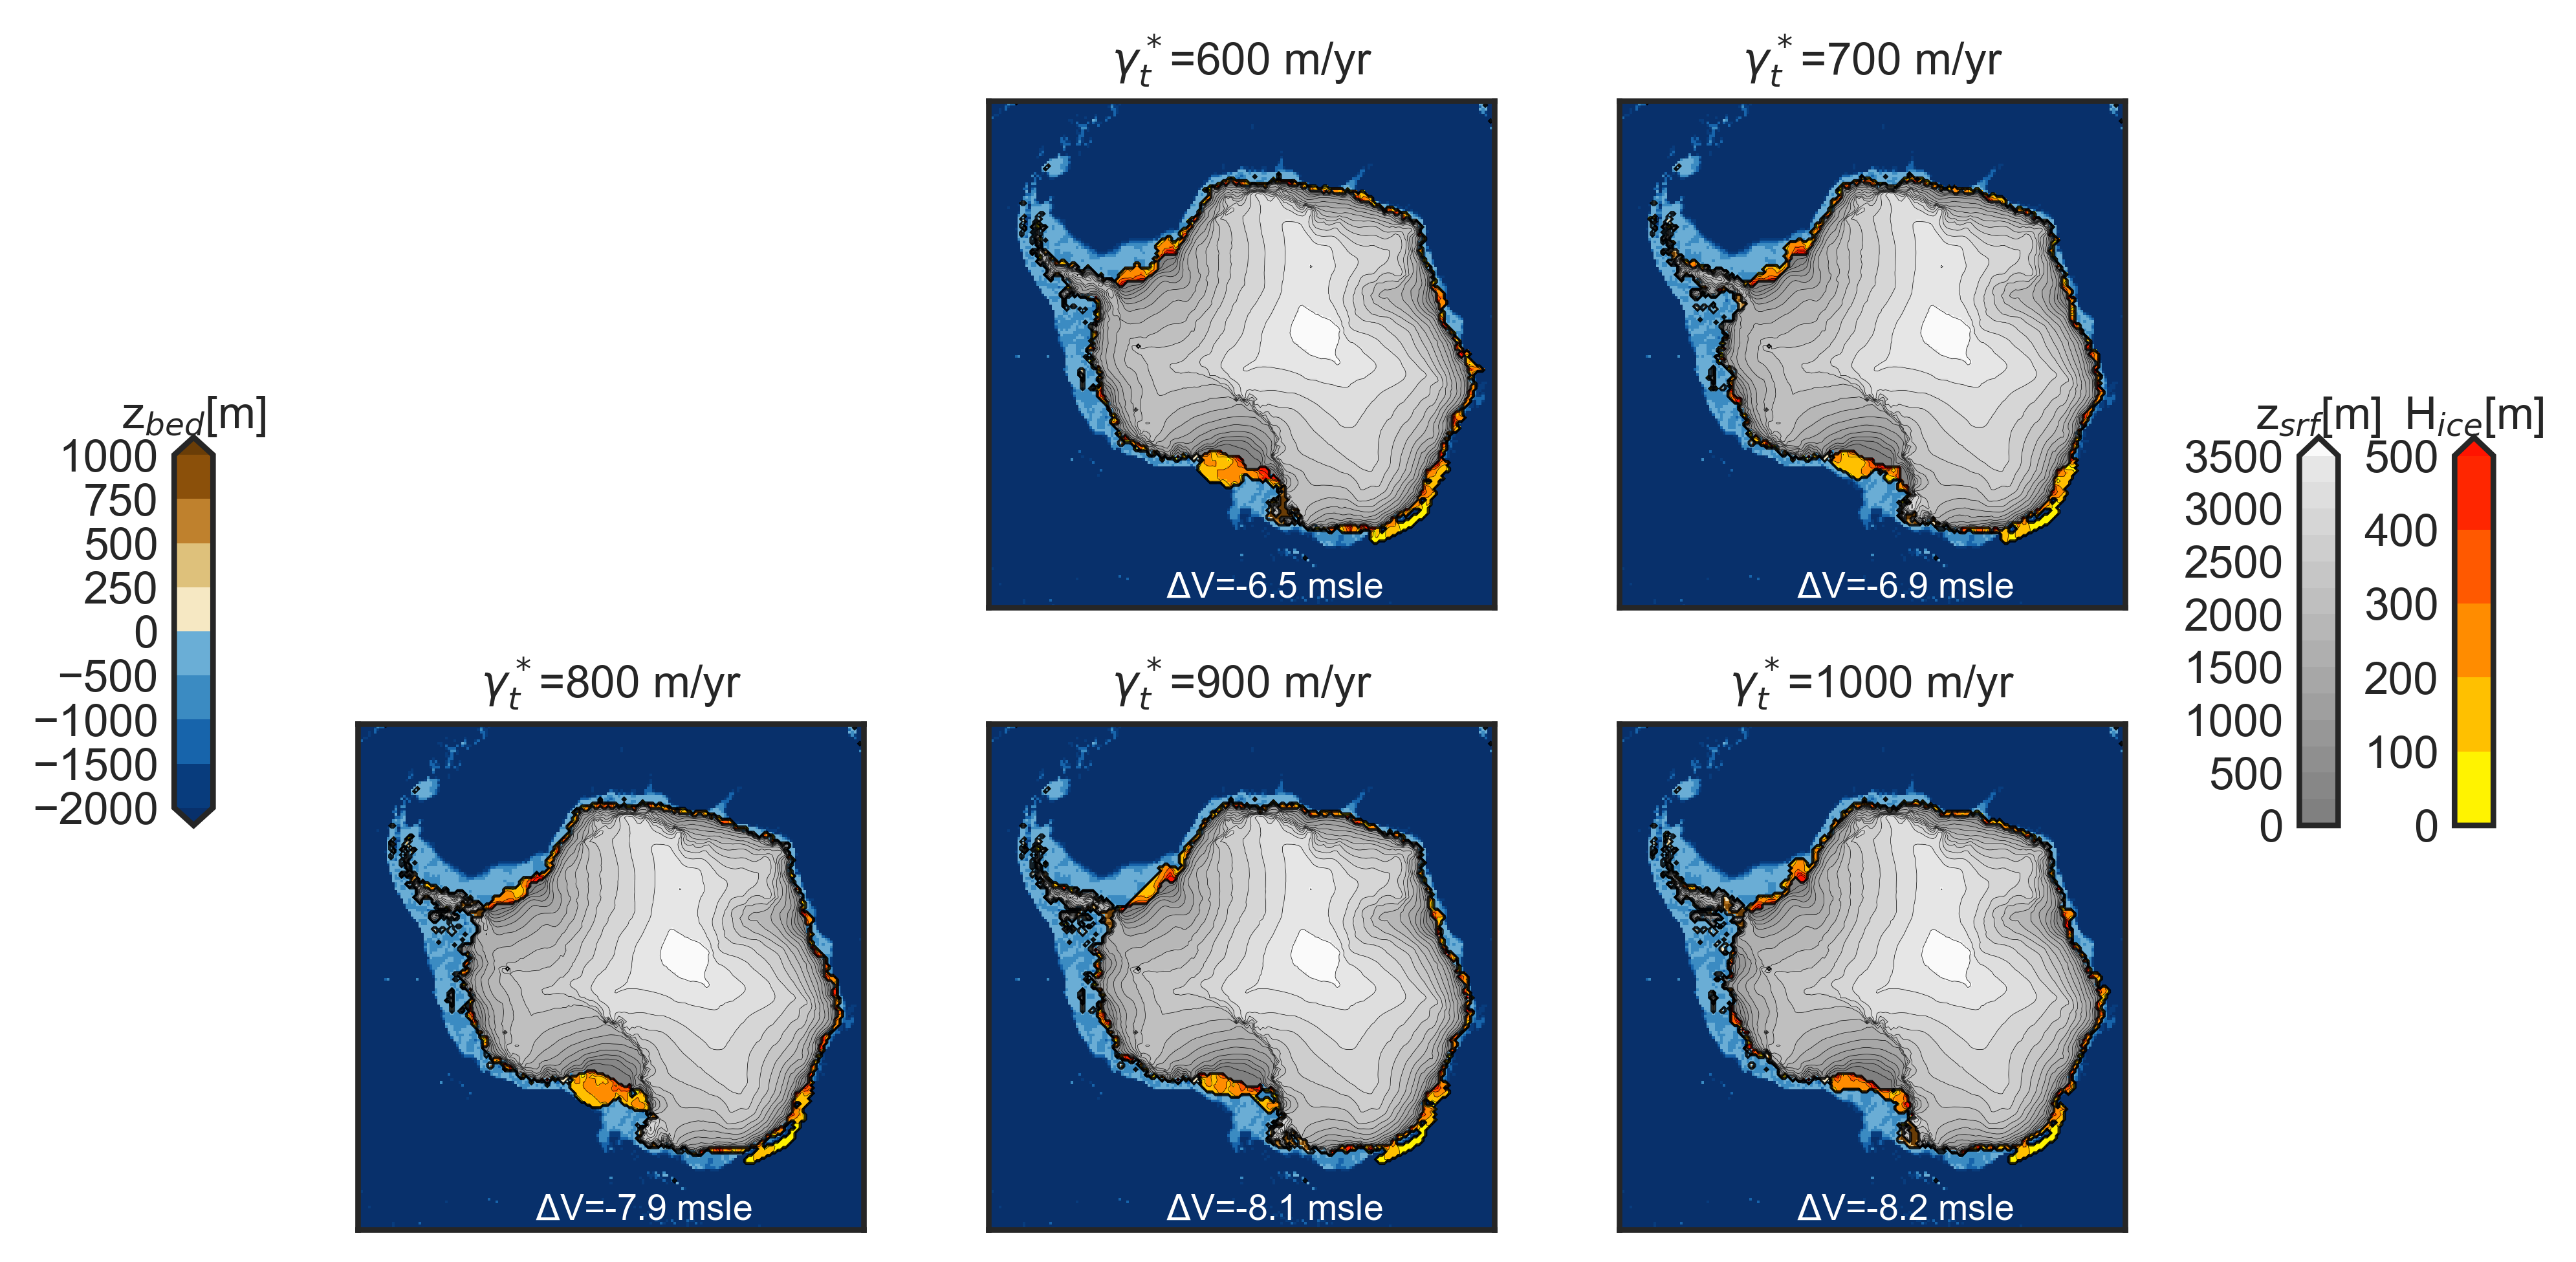

In [50]:
index = 45

fig = plt.figure(dpi=500)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

gamma_tstar = [600,700,800,900,1000]
vsle       = np.zeros(len(gamma_tstar))

c  = 0
fs = 10
for i in range(len(gamma_tstar)):
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo1D.nc')
    data = read_nc(ncfile)
    size = data.time.size
    vsle[i] = data['V_sle'].ix[20*index] - vol_lgm
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_min.nc')
    data = read_nc(ncfile)
    z_bed = data['z_bed'].ix[0]
    z_srf = data['z_srf'].ix[0]
    mask = data['mask_bed'].ix[0]
    H_ice = data['H_ice'].ix[0]ax1.set_title(r'$\gamma_t^*$='+str(gamma_tstar[0]),fontsize=fs)
ax2.set_title(r'$\gamma_t^*$='+str(gamma_tstar[1]),fontsize=fs)
ax3.set_title(r'$\gamma_t^*$='+str(gamma_tstar[2]),fontsize=fs)
ax4.set_title(r'$\gamma_t^*$='+str(gamma_tstar[3]),fontsize=fs)
ax5.set_title(r'$\gamma_t^*$='+str(gamma_tstar[4]),fontsize=fs)
    z_srf[mask==0]=np.nan
    z_srf[H_ice==0]=np.nan
    ncfile_shlf = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_min.nc')
    data_shlf = read_nc(ncfile_shlf)
    size_shlf = data_shlf.time.size
    H_shlf = data_shlf['H_ice'].ix[0]
    H_shlf[H_shlf<10.0] = 0.0
    H_shlf[mask==1]=np.nan
    mask_shlf = data_shlf['mask_bed'].ix[0]
    mask_shlf[mask_shlf<5]=0
    mask_shlf[mask_shlf>4]=1
        
    if c==0:
        im_b = ax1.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        im_s = ax1.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        im_sh = ax1.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax1.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax1.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax1.contour(mask==1,linewidths=0.1,colors='k')
        ax1.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==1:
        ax2.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax2.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax2.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax2.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax2.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax2.contour(mask==1,linewidths=0.1,colors='k')
        ax2.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==2:
        ax3.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax3.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax3.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax3.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax3.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax3.contour(mask==1,linewidths=0.1,colors='k')
        ax3.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==3:
        ax4.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax4.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax4.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax4.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax4.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax4.contour(mask==1,linewidths=0.1,colors='k')
        ax4.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==4:
        ax5.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax5.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax5.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax5.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax5.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax5.contour(mask==1,linewidths=0.1,colors='k')ax1.set_title(r'$\gamma_t^*$='+str(gamma_tstar[0]),fontsize=fs)
ax2.set_title(r'$\gamma_t^*$='+str(gamma_tstar[1]),fontsize=fs)
ax3.set_title(r'$\gamma_t^*$='+str(gamma_tstar[2]),fontsize=fs)
ax4.set_title(r'$\gamma_t^*$='+str(gamma_tstar[3]),fontsize=fs)
ax5.set_title(r'$\gamma_t^*$='+str(gamma_tstar[4]),fontsize=fs)
        ax5.contour(H_ice==0,linewidths=0.1,colors='k')
    c = c+1
            
ax1.invert_yaxis()
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.invert_yaxis()
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.invert_yaxis()
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax4.invert_yaxis()
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax5.invert_yaxis()
ax5.set_yticklabels([])
ax5.set_xticklabels([])

cax_s = fig.add_axes([1.045, 0.35, 0.02, 0.3])
cb_s = fig.colorbar(im_s, cax=cax_s,extend='max',orientation='vertical')
cb_s.ax.tick_params(labelsize=10,rotation=0)
cax_s.yaxis.set_ticks_position('left')
cb_s.ax.set_title(r'z$_{srf}$[m]',fontsize=10)

cax_sh = fig.add_axes([1.125, 0.35, 0.02, 0.3])
cb_sh = fig.colorbar(im_sh, cax=cax_sh,extend='max',orientation='vertical')
cb_sh.ax.tick_params(labelsize=10,rotation=0)
cax_sh.yaxis.set_ticks_position('left')
cb_sh.ax.set_title(r'H$_{ice}$[m]',fontsize=10)

cax_b = fig.add_axes([-0.05, 0.35, 0.02, 0.3])
cb_b = fig.colorbar(im_b, cax=cax_b,extend='both',orientation='vertical')
cb_b.ax.tick_params(labelsize=10,rotation=0)
cax_b.yaxis.set_ticks_position('left')
cb_b.ax.set_title(r'z$_{bed}$[m]',fontsize=10)

fs=10
ax1.set_title(r'$\gamma_t^*$='+str(gamma_tstar[0])+' m/yr',fontsize=fs)
ax2.set_title(r'$\gamma_t^*$='+str(gamma_tstar[1])+' m/yr',fontsize=fs)
ax3.set_title(r'$\gamma_t^*$='+str(gamma_tstar[2])+' m/yr',fontsize=fs)
ax4.set_title(r'$\gamma_t^*$='+str(gamma_tstar[3])+' m/yr',fontsize=fs)
ax5.set_title(r'$\gamma_t^*$='+str(gamma_tstar[4])+' m/yr',fontsize=fs)

ax1.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[0]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax2.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[1]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax3.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[2]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax4.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[3]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax5.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[4]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')

plt.tight_layout()
plt.show()

Ahora dibujare la extensión antártica en el periodo 24/22kyr (máximo). Indice = 52/53

/tmp/ipykernel_63138/1432750825.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


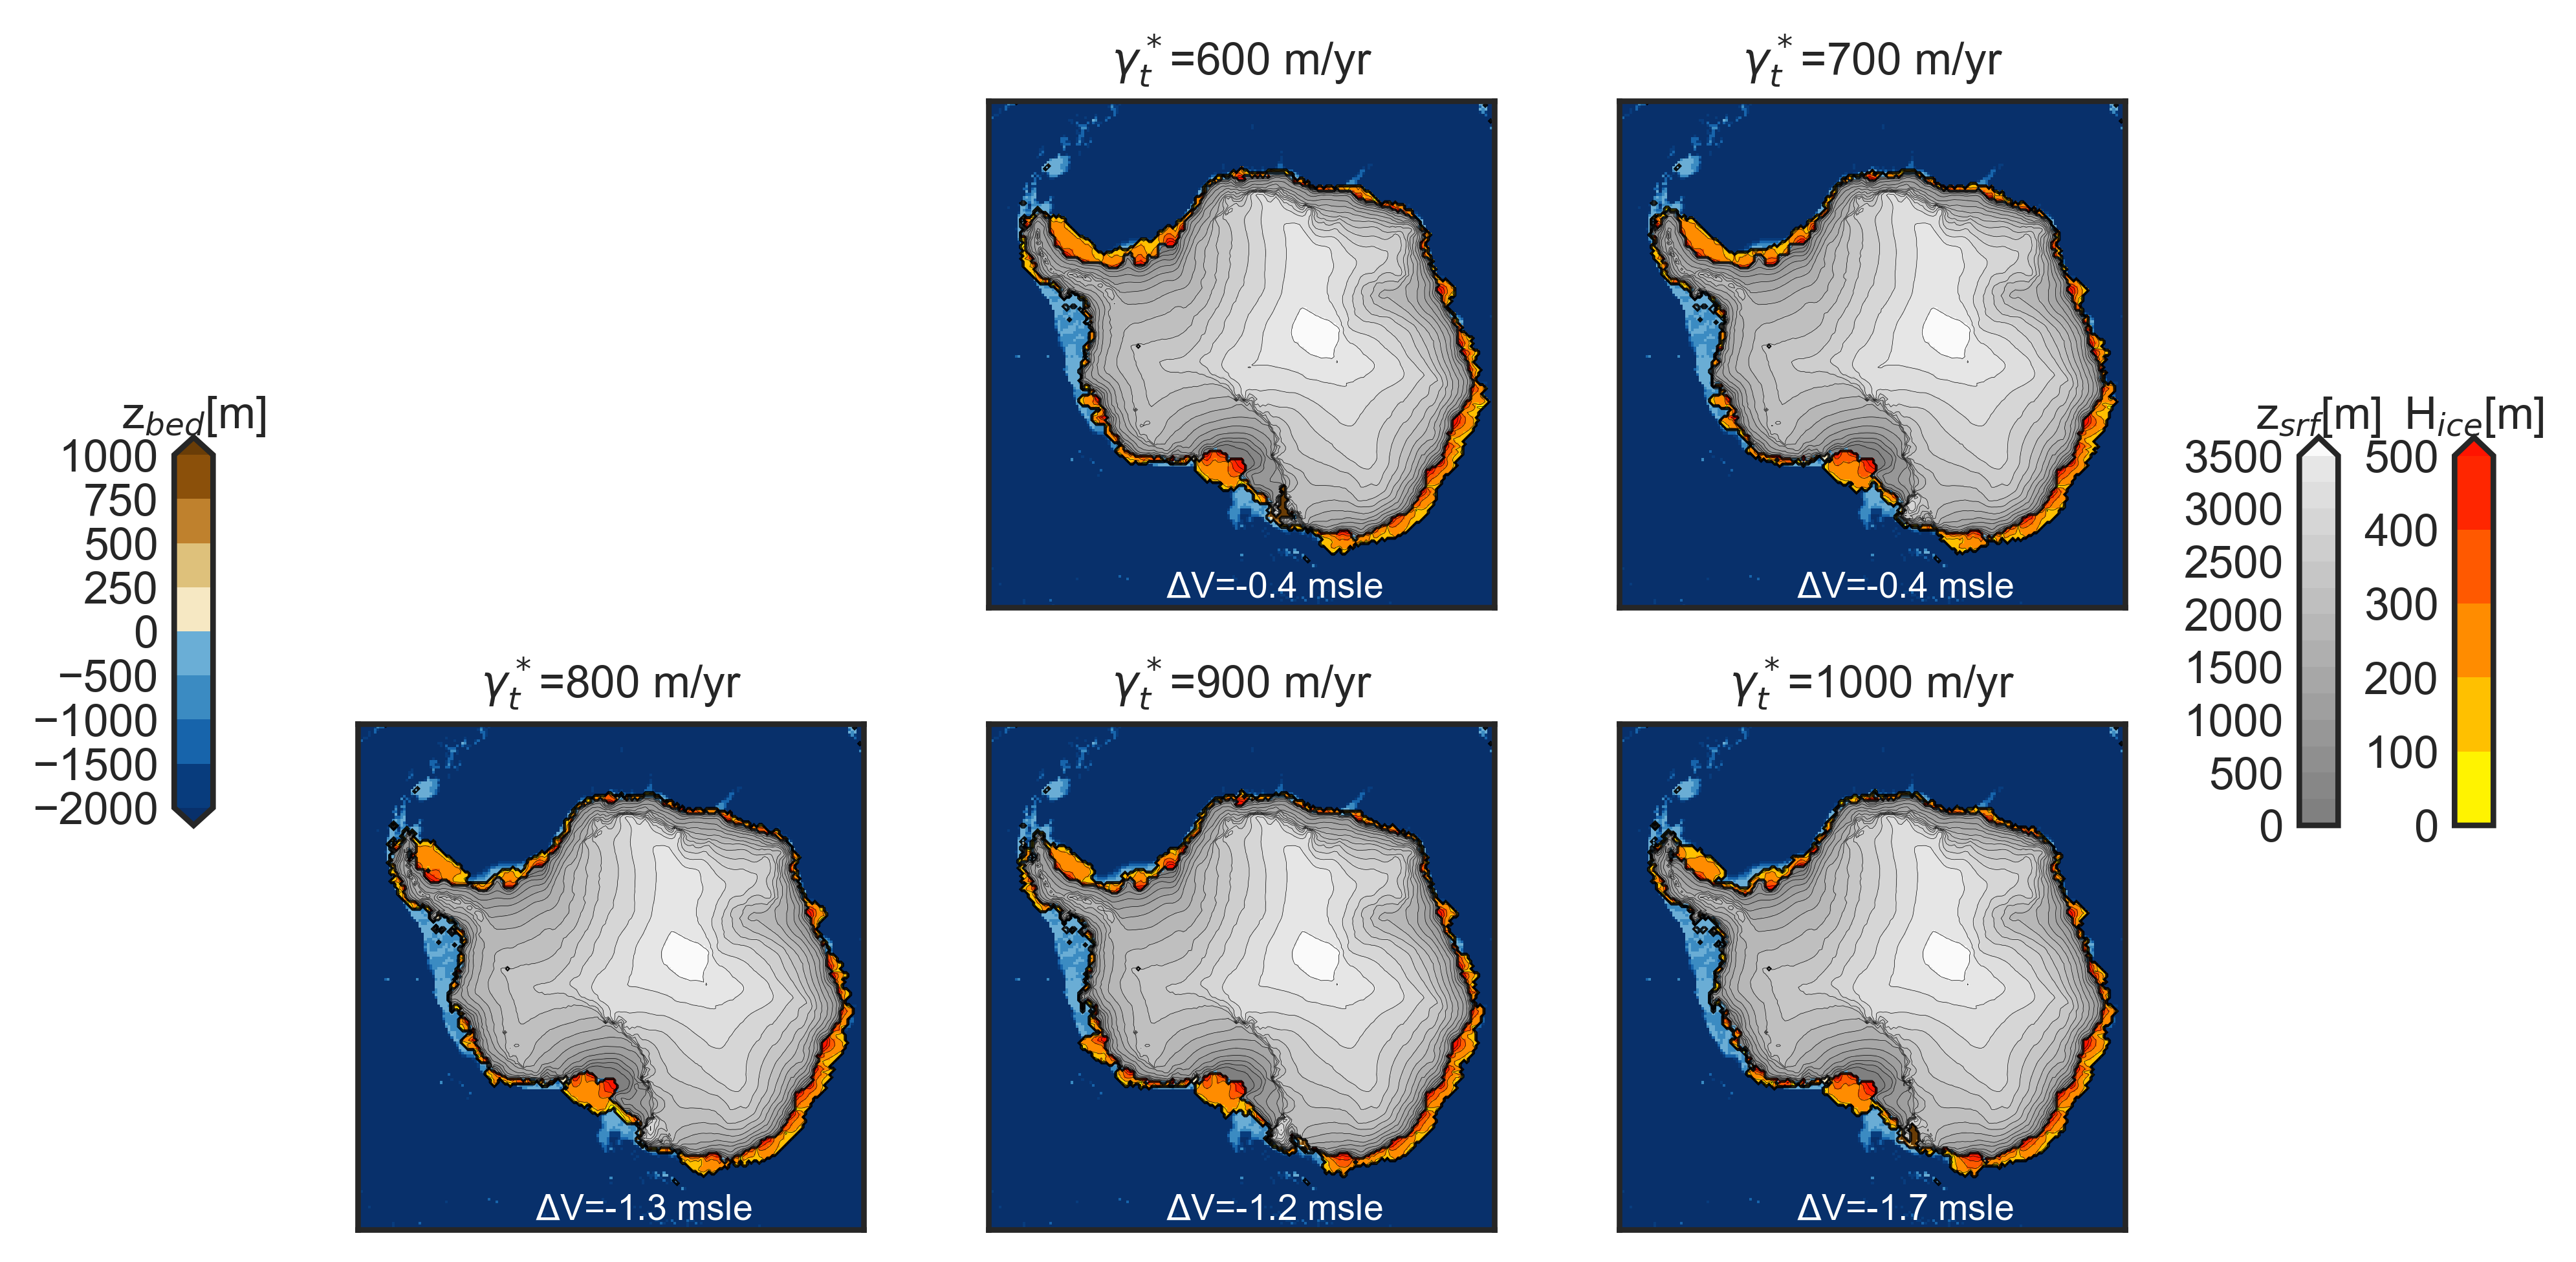

In [51]:
index = 52

fig = plt.figure(dpi=500)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

gamma_tstar = [600,700,800,900,1000]
vsle       = np.zeros(len(gamma_tstar))

c  = 0
fs = 10
for i in range(len(gamma_tstar)):
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo1D.nc')
    data = read_nc(ncfile)
    size = data.time.size
    vsle[i] = data['V_sle'].ix[20*index] - vol_lgm
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_max.nc')
    data = read_nc(ncfile)
    z_bed = data['z_bed'].ix[0]
    z_srf = data['z_srf'].ix[0]
    mask = data['mask_bed'].ix[0]
    H_ice = data['H_ice'].ix[0]
    H_ice[H_ice<10.0] = 0.0
    mask[mask>4]=0
    mask[mask>0]=1
    z_srf[mask==0]=np.nan
    z_srf[H_ice==0]=np.nan
    ncfile_shlf = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_max.nc')
    data_shlf = read_nc(ncfile_shlf)
    H_shlf = data_shlf['H_ice'].ix[0]
    H_shlf[H_shlf<10.0] = 0.0
    H_shlf[mask==1]=np.nan
    mask_shlf = data_shlf['mask_bed'].ix[0]
    mask_shlf[mask_shlf<5]=0
    mask_shlf[mask_shlf>4]=1
        
    if c==0:
        im_b = ax1.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        im_s = ax1.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        im_sh = ax1.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax1.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax1.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax1.contour(mask==1,linewidths=0.1,colors='k')
        ax1.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==1:
        ax2.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax2.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax2.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax2.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax2.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax2.contour(mask==1,linewidths=0.1,colors='k')
        ax2.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==2:
        ax3.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax3.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax3.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax3.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax3.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax3.contour(mask==1,linewidths=0.1,colors='k')
        ax3.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==3:
        ax4.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax4.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax4.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax4.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax4.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax4.contour(mask==1,linewidths=0.1,colors='k')
        ax4.contour(H_ice==0,linewidths=0.1,colors='k')
    if c==4:
        ax5.imshow(z_bed,norm=norm_b,cmap=cmap_b)
        ax5.imshow(z_srf,norm=norm_s,cmap=cmap_s)
        ax5.imshow(H_shlf,norm=norm_sh,cmap=cmap_sh)
        ax5.contour(z_srf,np.linspace(lim_min,lim_max,N+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax5.contour(H_shlf,np.linspace(sh_min,sh_max,SH+1),linewidths=0.1,norm=norm_s,colors='k',linestyles='-')
        ax5.contour(mask==1,linewidths=0.1,colors='k')
        ax5.contour(H_ice==0,linewidths=0.1,colors='k')
    c = c+1
            
ax1.invert_yaxis()
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.invert_yaxis()
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.invert_yaxis()
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax4.invert_yaxis()
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax5.invert_yaxis()
ax5.set_yticklabels([])
ax5.set_xticklabels([])

cax_s = fig.add_axes([1.045, 0.35, 0.02, 0.3])
cb_s = fig.colorbar(im_s, cax=cax_s,extend='max',orientation='vertical')
cb_s.ax.tick_params(labelsize=10,rotation=0)
cax_s.yaxis.set_ticks_position('left')
cb_s.ax.set_title(r'z$_{srf}$[m]',fontsize=10)

cax_sh = fig.add_axes([1.125, 0.35, 0.02, 0.3])
cb_sh = fig.colorbar(im_sh, cax=cax_sh,extend='max',orientation='vertical')
cb_sh.ax.tick_params(labelsize=10,rotation=0)
cax_sh.yaxis.set_ticks_position('left')
cb_sh.ax.set_title(r'H$_{ice}$[m]',fontsize=10)

cax_b = fig.add_axes([-0.05, 0.35, 0.02, 0.3])
cb_b = fig.colorbar(im_b, cax=cax_b,extend='both',orientation='vertical')
cb_b.ax.tick_params(labelsize=10,rotation=0)
cax_b.yaxis.set_ticks_position('left')
cb_b.ax.set_title(r'z$_{bed}$[m]',fontsize=10)

fs=10
ax1.set_title(r'$\gamma_t^*$='+str(gamma_tstar[0])+' m/yr',fontsize=fs)
ax2.set_title(r'$\gamma_t^*$='+str(gamma_tstar[1])+' m/yr',fontsize=fs)
ax3.set_title(r'$\gamma_t^*$='+str(gamma_tstar[2])+' m/yr',fontsize=fs)
ax4.set_title(r'$\gamma_t^*$='+str(gamma_tstar[3])+' m/yr',fontsize=fs)
ax5.set_title(r'$\gamma_t^*$='+str(gamma_tstar[4])+' m/yr',fontsize=fs)

ax1.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[0]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax2.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[1]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax3.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[2]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax4.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[3]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')
ax5.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[4]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='w')

plt.tight_layout()
plt.show()

Finalmente dibujamos las anomalías entre el máximo y el mínimo

/tmp/ipykernel_63138/1804232566.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


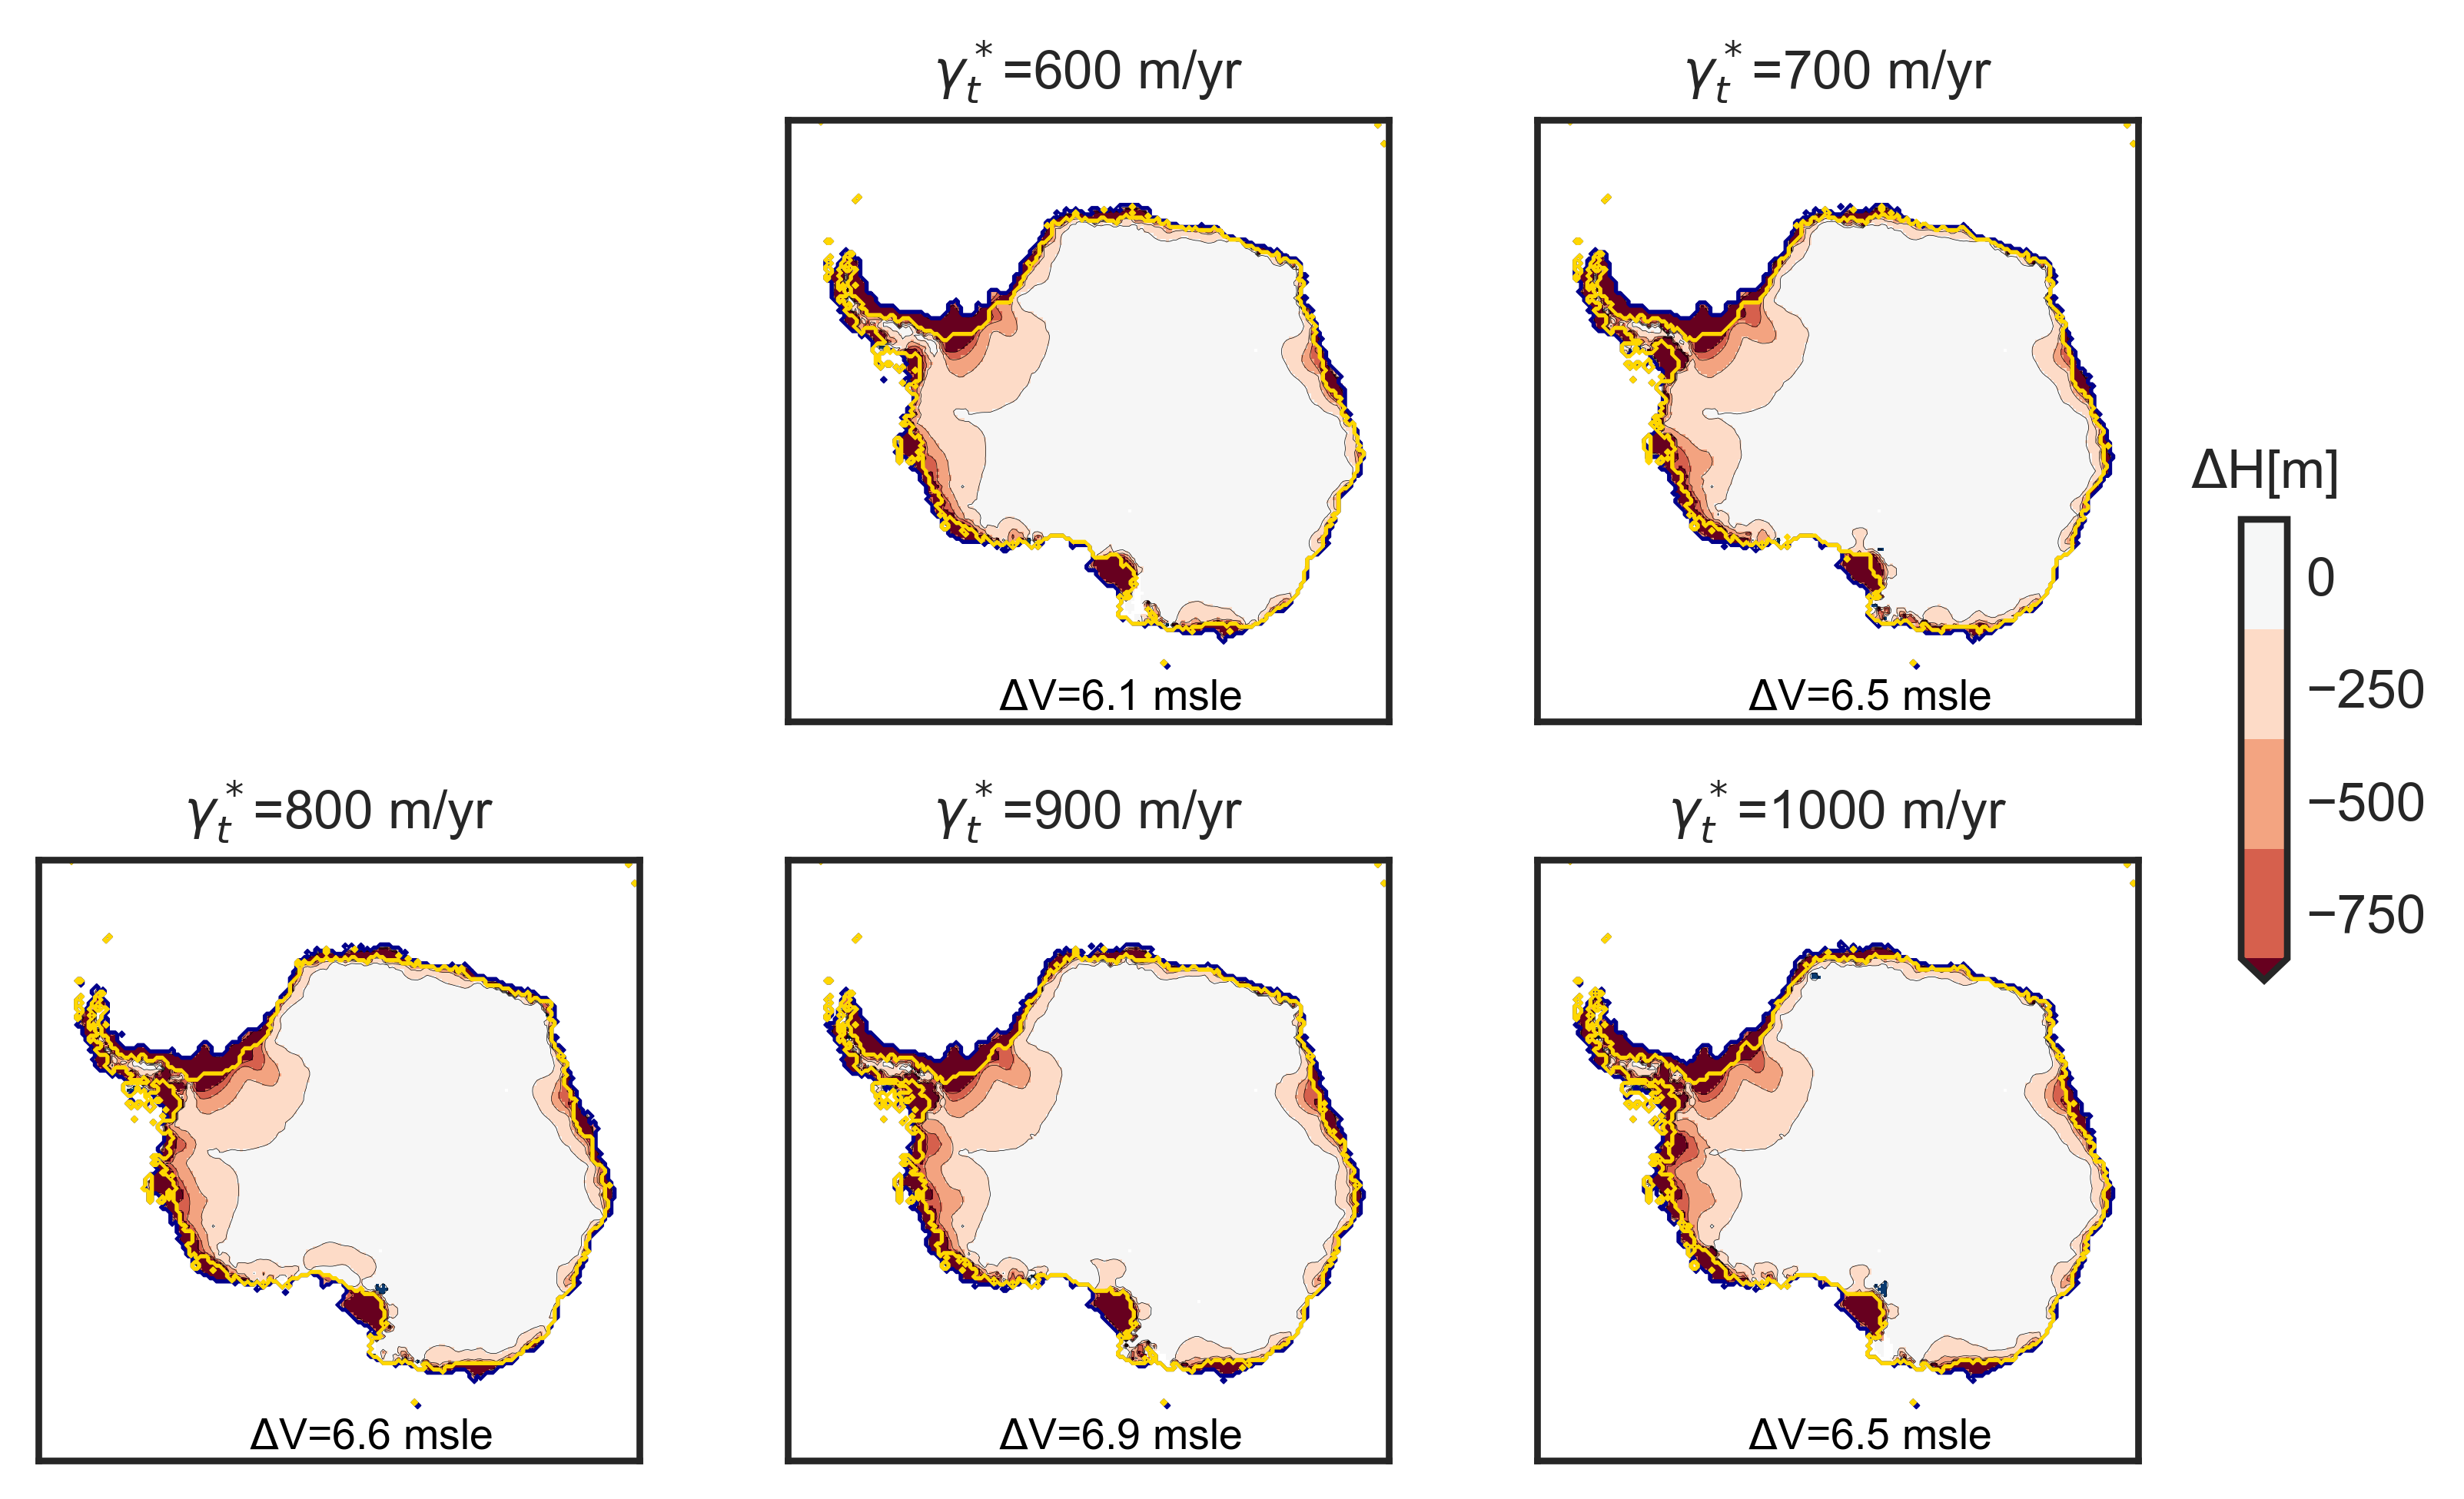

In [52]:
index_min = 45
index_max = 52

fig = plt.figure(dpi=500)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

gamma_tstar = [600,700,800,900,1000]
vsle       = np.zeros(len(gamma_tstar))

c  = 0
fs = 10
for i in range(len(gamma_tstar)):
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo1D.nc')
    data = read_nc(ncfile)
    size = data.time.size
    vsle[i] = data['V_sle'].ix[20*index_max] - data['V_sle'].ix[20*index_min]
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_max.nc')
    data = read_nc(ncfile)
    H_ice_max = data['H_ice'].ix[0]
    mask_max  = data['mask_bed'].ix[0]
    mask_max[mask_max>4]=0
    mask_max[mask_max>0]=1
    ncfile = os.path.join(get_datadir(), str(path)+str(gamma_tstar[i])+'/yelmo2D_min.nc')
    data = read_nc(ncfile)
    H_ice_min = data['H_ice'].ix[0]
    mask_min  = data['mask_bed'].ix[0]
    mask_min[mask_min>4]=0
    mask_min[mask_min>0]=1

    H_ice_max[mask_max==0]=np.nan
    H_ice_min[mask_min==0]=0.0
    dH = H_ice_min - H_ice_max
    dH[dH==0.0]= np.nan
        
    if c==0:
        im_ah = ax1.imshow(dH,norm=norm_ah,cmap=cmap_ah)
        ax1.contour(dH,levels_ah,linewidths=0.1,norm=norm_ah,colors='k',linestyles='-')
        ax1.contour(mask_max==1,linewidths=0.25,colors='darkblue')
        ax1.contour(mask_min==1,linewidths=0.25,colors='gold')
    if c==1:
        ax2.imshow(dH,norm=norm_ah,cmap=cmap_ah)
        ax2.contour(dH,levels_ah,linewidths=0.1,norm=norm_ah,colors='k',linestyles='-')
        ax2.contour(mask_max==1,linewidths=0.25,colors='darkblue')
        ax2.contour(mask_min==1,linewidths=0.25,colors='gold')
    if c==2:
        ax3.imshow(dH,norm=norm_ah,cmap=cmap_ah)
        ax3.contour(dH,levels_ah,linewidths=0.1,norm=norm_ah,colors='k',linestyles='-')
        ax3.contour(mask_max==1,linewidths=0.25,colors='darkblue')
        ax3.contour(mask_min==1,linewidths=0.25,colors='gold')
    if c==3:
        ax4.imshow(dH,norm=norm_ah,cmap=cmap_ah)
        ax4.contour(dH,levels_ah,linewidths=0.1,norm=norm_ah,colors='k',linestyles='-')
        ax4.contour(mask_max==1,linewidths=0.25,colors='darkblue')
        ax4.contour(mask_min==1,linewidths=0.25,colors='gold')
    if c==4:
        ax5.imshow(dH,norm=norm_ah,cmap=cmap_ah)
        ax5.contour(dH,levels_ah,linewidths=0.1,norm=norm_ah,colors='k',linestyles='-')
        ax5.contour(mask_max==1,linewidths=0.25,colors='darkblue')
        ax5.contour(mask_min==1,linewidths=0.25,colors='gold')
    c = c+1
            
ax1.invert_yaxis()
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.invert_yaxis()
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.invert_yaxis()
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax4.invert_yaxis()
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax5.invert_yaxis()
ax5.set_yticklabels([])
ax5.set_xticklabels([])

cax_ah = fig.add_axes([1.0, 0.35, 0.02, 0.3])
cb_ah = fig.colorbar(im_ah, cax=cax_ah,extend='min',orientation='vertical')
cb_ah.set_ticks([-750,-500,-250,0])
cb_ah.ax.tick_params(labelsize=10,rotation=0)
cax_ah.yaxis.set_ticks_position('right')
cb_ah.ax.set_title(r'$\Delta$H[m]',fontsize=10)

ax1.set_title(r'$\gamma_t^*$='+str(gamma_tstar[0])+' m/yr',fontsize=fs)
ax2.set_title(r'$\gamma_t^*$='+str(gamma_tstar[1])+' m/yr',fontsize=fs)
ax3.set_title(r'$\gamma_t^*$='+str(gamma_tstar[2])+' m/yr',fontsize=fs)
ax4.set_title(r'$\gamma_t^*$='+str(gamma_tstar[3])+' m/yr',fontsize=fs)
ax5.set_title(r'$\gamma_t^*$='+str(gamma_tstar[4])+' m/yr',fontsize=fs)

ax1.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[0]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='k')
ax2.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[1]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='k')
ax3.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[2]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='k')
ax4.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[3]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='k')
ax5.annotate(r'$\Delta$V='+str('{0:.1f}'.format(vsle[4]))+' msle', xy=(0.35, 0.02), xycoords='axes fraction',fontsize=fs-2,color='k')

plt.tight_layout()
plt.show()